In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from importlib import reload
import utils
import consts
from statannotations.Annotator import Annotator
reload(utils)
reload(consts)
PATH = os.getcwd()
# Load data
results_df = pd.read_csv(os.path.join(PATH, 'data', 'results', 'res_RCC4_VHL_combined.csv'))
results_df['oxphos_lfc'] = 0
results_df['ribosome_lfc'] = 0
results_df['lombardi_hindex'] = 0
results_df['oxphos_mitochondrial_value'] = 0
results_df['oxphos_nuclear_value'] = 0
results_df['ribosome_mitochondrial_value'] = 0
results_df['ribosome_nuclear_value'] = 0
display(results_df.info())
with open(os.path.join(PATH, 'data', 'genes', 'Lombardi_hyp_genes.txt')) as f:
    lombardi_gene_list = f.read().splitlines()
%matplotlib inline


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94383 entries, 0 to 94382
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gene                          94383 non-null  object 
 1   baseMean                      94383 non-null  float64
 2   log2FoldChange                94383 non-null  float64
 3   lfcSE                         94383 non-null  float64
 4   stat                          94383 non-null  float64
 5   pvalue                        94383 non-null  float64
 6   padj                          75047 non-null  float64
 7   dataset                       94383 non-null  object 
 8   cell_line                     94383 non-null  object 
 9   Oxygen Concentration          94383 non-null  int64  
 10  Name                          792 non-null    object 
 11  Complex                       792 non-null    object 
 12  Description                   792 non-null    object 
 13  P

None

In [2]:
results_df_mat = results_df[(results_df['padj'] < 0.05)].pivot_table(index = 'gene', columns = 'dataset', values = 'log2FoldChange')
results_df_mat_all = results_df.pivot_table(index = 'gene', columns = 'dataset', values = 'log2FoldChange')
results_df_mat = results_df_mat.dropna(axis = 1, how = 'all').fillna(0)
# Select oxphos genes 
oxphos_results = results_df_mat.loc[[i for i in results_df[results_df['Function'] == 'OXPHOS'].gene.unique() if i in results_df_mat.index],:]
# Sort oxphos_results by median LFC
oxphos_results = oxphos_results.loc[oxphos_results.median(axis = 1).sort_values(ascending = False).index,:]


In [3]:
reload(utils)
# Load TCA Genes
tca_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'TCA_Go.txt'), mode = 'tsv').rename(columns = {'OGDHL' : 'gene'})
# Drop duplicate genes
tca_genes = tca_genes.drop_duplicates()
# Drop gene value 'gene'
tca_genes = tca_genes[tca_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
tca_genes = [i.upper() for i in tca_genes]

# Load glycolysis genes
glycolysis_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'glycolytic processGO_0006096.txt'))
# Drop duplicate genes
glycolysis_genes = glycolysis_genes.drop_duplicates()
# Drop gene value 'gene'
glycolysis_genes = glycolysis_genes[glycolysis_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
glycolysis_genes = [i.upper() for i in glycolysis_genes]

# Load ROS genes
ros_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'ROS_production.tsv'))
# Drop duplicate genes
ros_genes = ros_genes.drop_duplicates().Name.unique().tolist()
# Upper list
ros_genes = [i.upper() for i in ros_genes]

# Load Mitophagy genes
mitophagy_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'MITOPHAGY.txt'))
# Drop duplicate genes
mitophagy_genes = mitophagy_genes.drop_duplicates()
# Upper list
mitophagy_genes = [i.upper() for i in mitophagy_genes]

# Lactate dehydrogenase genes
ldh_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'L-lactate dehydrogenase activityGO_0004459.txt'))
# Drop duplicate genes
ldh_genes = ldh_genes.drop_duplicates()
# Drop gene value 'gene'
ldh_genes = ldh_genes[ldh_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
ldh_genes = [i.upper() for i in ldh_genes]


# Create glyc genes mat
gly_genes_mat = results_df_mat.loc[[i for i in glycolysis_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
gly_genes_mat = gly_genes_mat.loc[((gly_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
gly_genes_mat = gly_genes_mat.loc[gly_genes_mat.isna().mean(axis = 1) < 0.5, :]
gly_genes_mat = gly_genes_mat.loc[gly_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]
# Create ros genes mat
ros_genes_mat = results_df_mat.loc[[i for i in ros_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
ros_genes_mat = ros_genes_mat.loc[((ros_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
ros_genes_mat = ros_genes_mat.loc[ros_genes_mat.isna().mean(axis = 1) < 0.5, :]
ros_genes_mat = ros_genes_mat.loc[ros_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]
# Create TCA genes mat
tca_genes_mat = results_df_mat.loc[[i for i in tca_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
tca_genes_mat = tca_genes_mat.loc[((tca_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
tca_genes_mat = tca_genes_mat.loc[tca_genes_mat.isna().mean(axis = 1) < 0.5, :]
tca_genes_mat = tca_genes_mat.loc[tca_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]

# Mitophagy genes mat
mitophagy_genes_mat = results_df_mat.loc[[i for i in mitophagy_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
mitophagy_genes_mat = mitophagy_genes_mat.loc[((mitophagy_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
mitophagy_genes_mat = mitophagy_genes_mat.loc[mitophagy_genes_mat.isna().mean(axis = 1) < 0.5, :]
mitophagy_genes_mat = mitophagy_genes_mat.loc[mitophagy_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]



In [24]:
# Print the log2foldchange of VHL
vhl_gene_only = results_df[results_df['gene'].isin(['HIF1A'])]
display(vhl_gene_only[['dataset', 'gene', 'baseMean', 'log2FoldChange', 'padj']])

,dataset,gene,baseMean,log2FoldChange,padj
1980,RCC4_VHL_OE_1,HIF1A,3665.681505,-1.495178,3.357666e-08
23418,RCC4_VHL_OE_2,HIF1A,8596.760710,-2.958482,0.000000e+00
41397,RCC786_VHL_OE_1,HIF1A,1363.763284,-0.536700,8.232685e-07
76002,RCC786_VHL_OE_2,HIF1A,1874.817134,-1.350402,3.341165e-32


In [14]:
# Print the log2foldchange of VHL
vhl_gene_only = results_df[results_df['gene'] == 'VHL']
display(vhl_gene_only[['dataset', 'baseMean','log2FoldChange', 'padj']])

,dataset,baseMean,log2FoldChange,padj
5481,RCC4_VHL_OE_1,30587.084310,-3.756328,1.409541e-01
26811,RCC4_VHL_OE_2,596.644586,-1.581240,8.353275e-21
45657,RCC786_VHL_OE_1,17887.374974,-3.427326,0.000000e+00
79601,RCC786_VHL_OE_2,1944.557914,-1.646789,2.059842e-46


Mean up: 9.67+-6.66, mean down: 7.0+-6.24
Mean up: 15.5+-7.05, mean down: 5.75+-3.86
Mean up: 42.5+-27.74, mean down: 28.5+-19.74
Mean up: 15.0+-6.24, mean down: 18.33+-0.58
Mean up: 13.0+-9.31, mean down: 18.25+-11.9
Mean up: 30.5+-7.59, mean down: 3.0+-2.58
Mean up: 10.75+-6.85, mean down: 12.0+-8.29


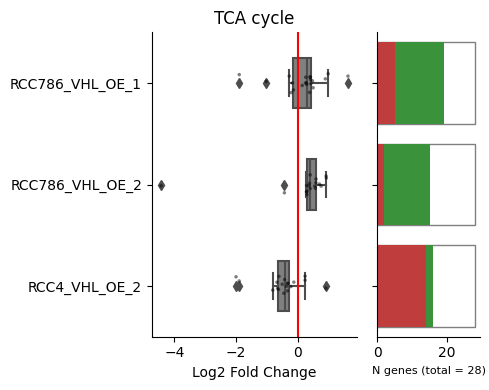

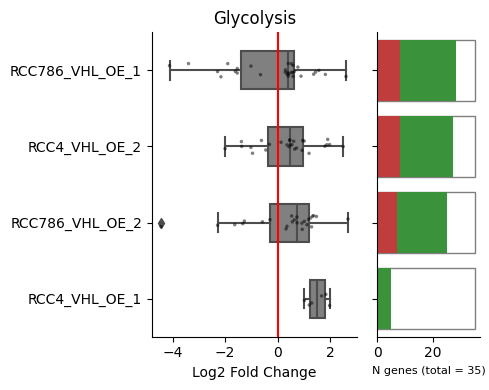

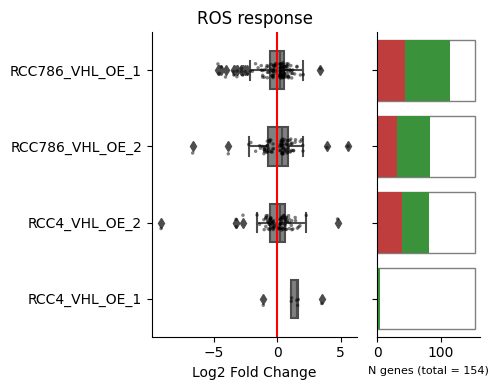

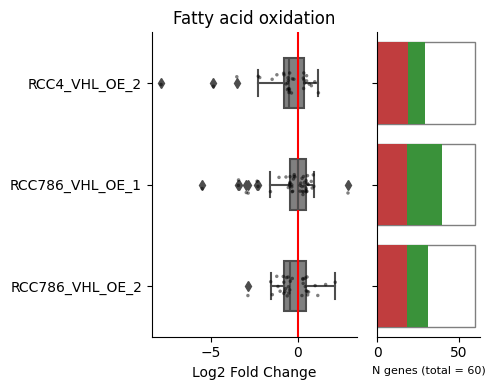

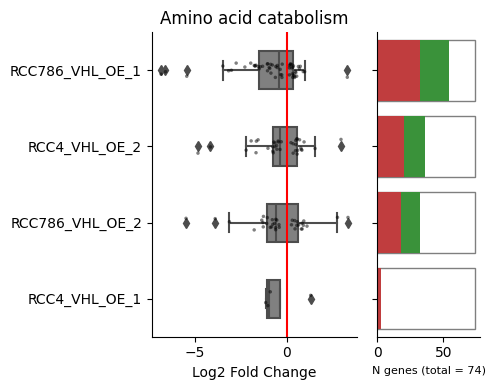

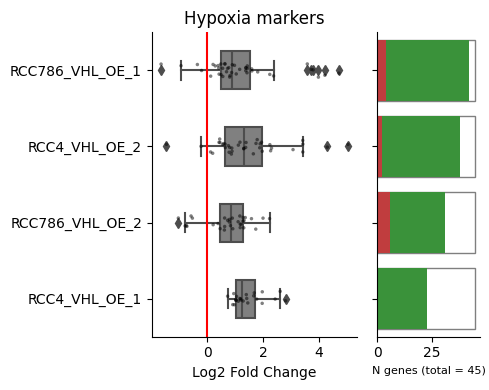

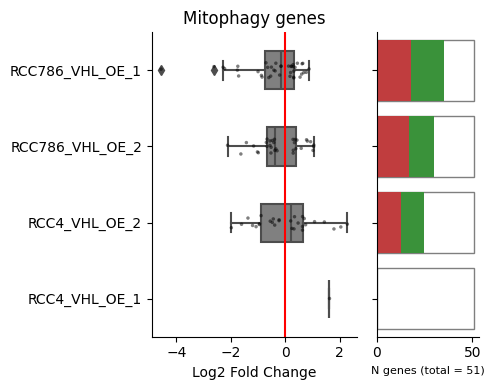

In [5]:
reload(utils)
threshold = 0.1
results_df_sign = results_df[results_df['padj'] < threshold]
lombardi_df, lombardi_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'Lombardi_hyp_genes.txt'), mode = 'txt', gene_col = 'gene', return_format='long', threshold = threshold)
tca_genes_df, tca_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'TCA_Go.txt'), mode = 'tsv', gene_col = 'OGDHL', return_format='long', threshold = threshold)
fatt_genes_df, fatt_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'FATTY_ACID_OXIDATION_GO.txt'), mode = 'txt', gene_col = 'gene', return_format='long', threshold = threshold)
gly_genes_df, gly_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'CANONICAL_GLYCOLYSIS_GO.txt'), mode = 'txt', gene_col = 'gene', return_format='long', threshold = threshold)
ros_genes_df, ros_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'ROS_production.tsv'), mode = 'tsv', gene_col = 'Name', return_format='long', threshold = threshold)
aa_catabolism_genes_df, aa_catabolism_dataset_df  = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'CATABOLISM_OF_AMINO_ACIDS_GO.txt'), mode = 'txt', gene_col = 'gene', return_format='long', threshold = threshold)
# Mitophagy genes df
mitophagy_genes_df, mitophagy_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'MITOPHAGY.txt'), mode = 'txt', gene_col = 'gene', return_format='long', threshold = threshold)

# Combine all datasets df into a summary df
tca_dataset_df['gene_set'] = 'TCA cycle genes'
gly_dataset_df['gene_set'] = 'Glycolysis genes'
ros_dataset_df['gene_set'] = 'ROS response genes'
fatt_dataset_df['gene_set'] = 'Fatty acid oxidation genes'
aa_catabolism_dataset_df['gene_set'] = 'Amino acid catabolism genes'
lombardi_dataset_df['gene_set'] = 'Lombardi hypoxia genes'
mitophagy_dataset_df['gene_set'] = 'Mitophagy genes'
dataset_df = pd.concat([tca_dataset_df, gly_dataset_df, ros_dataset_df, fatt_dataset_df, aa_catabolism_dataset_df], axis = 0)
# Plot 
xlab = 'Log2 Fold Change'
hue = ''
x = 'log2FoldChange'
sort_by = 'log2FoldChange'
palette = 'tab10'
corr_col = 'oxphos_coordination_value'
ascending = False
legend = False
correlate = False
figsize = (5,4)
utils.plot_gene_set_per_dataset(tca_genes_df, tca_dataset_df, savefig = 'tca_per_vhl', title = 'TCA cycle', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset',  figsize = figsize)
utils.plot_gene_set_per_dataset(gly_genes_df, gly_dataset_df, savefig = 'glycolysis_per_vhl', title = 'Glycolysis', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset',  figsize = figsize)
utils.plot_gene_set_per_dataset(ros_genes_df, ros_dataset_df, savefig = 'ros_vhl', title = 'ROS response', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset',  figsize = figsize)
utils.plot_gene_set_per_dataset(fatt_genes_df, fatt_dataset_df, savefig = 'fatty_acid_oxidation_per_vhl', title = 'Fatty acid oxidation', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset',  figsize = figsize)
utils.plot_gene_set_per_dataset(aa_catabolism_genes_df, aa_catabolism_dataset_df, savefig = 'aa_catabolism_per_vhl', title = 'Amino acid catabolism', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset', figsize = figsize)
utils.plot_gene_set_per_dataset(lombardi_df, lombardi_dataset_df, savefig = 'lombardi_vhl', title = 'Hypoxia markers', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset',  figsize = figsize)
utils.plot_gene_set_per_dataset(mitophagy_genes_df, mitophagy_dataset_df, savefig = 'mitophagy_per_vhl', title = 'Mitophagy genes', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset',  figsize = figsize)